<div><center>
<table><tr>
<td>
<img src="images/Embraer_logo.png" alt="Empresa Brasileira de Aeronáutica (Embraer)" style="width: 300px;"/>
    </td>
<td>
<img src="images/ITA_logo.png" alt="Instituto Tecnológico da Aeronáutica (ITA)" style="width: 300px;"/>
    </td>
    </tr></table
</center></div>

# EMBRAER | ITA

## ENGENHARIA AERONÁUTICA E MECÂNICA - PEE 30

### AC-701 : SISTEMAS PROPULSIVOS - PROF. LACAVA

### Autores:

* Camilla Santos
* Eloi Antonio
* Gabriel Henrique
* Jonas Degrave
* Lucas Schroeder
* Matheus Monteverde
* Orlando Gabriel
* Rafael Bayão

---

## Exercício 1: Montagem do Simulador

* Matheus Monteverde
* Rafael Bayão

### Estratégia para criação do simulador

O simulador foi montado a partir de uma arquitetura de Programação Orientada a Objetos. Dessa forma, foram modelados processos que são herdados pelos componentes e esses são utilizados pelos motores a medida da necessidade. Os a lista de objetos e suas funções podem ser visualizados abaixo:

Processos térmicos: cada processo armazena as propriedades adequadas para formulação de suas transformações.

* ThermalProcess: Classe principal que implementa métodos genéricos isentrópicos e é herdada pelas demais.
* StaticThermalProcess: implementa métodos para processos com entrada e saída com velocidades desprezíveis para o gás.
* SpeedInThermalProcess: implementa métodos para processos com entrada com velocidade considerável e saída com velocidade desprezível para o gás.
* SpeedOutThermalProcess: implementa métodos para processos com entrada com velocidade desprezível e saída com velocidade consideravel para o gás.

Componentes: cada componente herda um processo térmico adequado ao seu funcionamento implementa as equações necessárias. Os valores de entrada são armazenados e os de saída calculados ao serem invocados. Por fim, implementam métodos para variar a rotação e resumir todos os parametros inclusos.

* Diffuser_Adiab
* Nozzle_Adiab
* Compressor
* Fan
* Turbine
* FanTurbine
* FreeTurbine
* CombustionChamber

Motores: cada motor instancia sequencialmente os componentes necessários para o funcionamento e implementa métodos para ajustar globalmente a rotação e fornecer todas as propriedades de entrada e saída dos componentes e do próprio motor.

* TurboJet
* TurboFan
* TurboProp

### Exemplos resolvidos

#### Importação de pacotes

In [13]:
import model_reference as mf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings

plt.style.use('seaborn')
warnings.filterwarnings('ignore')

#### Exemplo 2.1: TurboJet

Informações do exercício:

Calcular o empuxo específico e consumo específico (TSFC) para um motor turbojato operando a Mach 0,85 e a 12.200 m (Pa = 18,75kPa e Ta = 216,7 K). Usar os dados abaixo para eficiências e razões de calor específico.

| Componente | Eficiência Adiabática| $\gamma$            |
|------------|----------------------|-------------------  |
| difusor    | 0,97                 | 1,40                |
| compressor | 0,85                 | 1,37                |
| combustão  | 1,00                 | 1,35                |
| turbina    | 0.90                 | 1,33                |
| bocal      | 0,98                 | 1,36                |

Dados operacionais


| Dados operacionais:                           | Valor             |
|-----------------------------------------------|-------------------|
| Razão de Pressão no compressor                | 30                |
| Temperatura na sáida da câmara de combustão   | 1600 K            |
| Poder Calorífico Inferior do Combustível      | 45000 kJ/kg       |
| R Médio                                       | 288,3 m^2/(s^2.K) |
| Cp no combustor                               | 1,11 kJ/(kg.K)    |



##### Solução

In [14]:
values_ex2_1 = {
    'ta':216.7,         # Temperatura ambiente
    'pa':18.750,        # Pressão atmosférica
    'gamma_d':1.4,      # gamma no difusor
    'gamma_c':1.37,     # gamma no compressor
    'gamma_b':1.35,     # gamma na combustão
    'gamma_t':1.33,     # gamma na turbina
    'gamma_n':1.36,     # gamma no bocal
    'n_d':0.97,         # eficiência no difusor
    'n_c':0.85,         # eficiência no compressor
    'n_b':1,            # eficiência na combustão
    'n_t':0.9,          # eficiência na turbina
    'n_n':0.98,         # eficiência no bocal
    'prc':30,           # Taxa de compressão - compressor
    'pc_fuel':45000,    # Poder Calorífico do combustível
    'cp_fuel':1.110,    # Capacidade calorífica do ar no combustor
    'r':288.3,          # R médio do ar
    't04':1600,         # Temperatura na saída da camera de combustão
    'mach':0.85         # mach de voo
    }

turbojet = mf.TurboJet(values_ex2_1)    # Instanciando o motor
targets = ['t02','p02','t03', 'p03', 'f', 't05', 'p05', 'u_s', 'TSFC', 'u_i', 'specific_thrust']    # Definindo variáveis de interesse
result_2_1 = (
    turbojet.sumarise().
    append(turbojet.sumarise_results()).
    loc[targets]
)
clean_names = ['Temperatura na Saída Difusor', 'Pressão na Saída Difusor', 
'Temperatura na Saída Compressor', 'Pressão na Saída Compressor', 
'Razão combustível/ar', 'Temperatura na Saída Turbina', 
'Pressão na Saída Turbina', 'Velocidade de Saída do ar', 
'Consumo específico', 'Velocidade de voo', 'Empuxo específico']
result_2_1.columns = ['Valores']
result_2_1.rename(index = dict(zip(targets, clean_names)))

,Valores
Temperatura na Saída Difusor,248.013150
Pressão na Saída Difusor,29.674830
Temperatura na Saída Compressor,687.349061
Pressão na Saída Compressor,890.244901
Razão combustível/ar,0.023437
Temperatura na Saída Turbina,1160.664089
Pressão na Saída Turbina,205.315935
Velocidade de Saída do ar,1078.304658
Consumo específico,0.027502
Velocidade de voo,251.382314


#### Comparação de resultados

| Parâmetro                                                 | Modelo            | Referência do material    | $\Delta$  |
|-----------------------------------------------------------|-------------------|---------------------------|-----------|
|Temp. total no final da entrada de ar                      | 248.013 K         | 248,013 K                 | 0 K       |
|Press. total no final da entrada de ar                     | 296.7483 kPa      | 29,6748 kPa               | 0 kPa     |
|Press. Total na saída do Compressor                        | 890,245 kPa       | 890,245 kPa               | 0 kPa     |
|Temp. total na saída do Compressor                         | 687,349 K         | 687,349 K                 | 0 K       |
|Razão Combustível/Ar                                       | 0,02344           | 0,02344                   | 0         |
|Temp. total na saída da turbina do compressor              |1160,66 K          | 1160,66 K                 | 0 K       |
|Press. total na saída da turbina do compressor             |205,316 kPa        |205,316 kPa                | 0 kPa     |
|Velocidade de saída                                        |1078,3 m/s         | 1078,3 m/s                | 0 m/s     |
|Consumo Específico                                         | 0,0275 kg/(kN.s)  | 0,0275 kg/(kN.s)          | 0 kg/(kN.s)|
|Velocidade de vôo                                          |251,382 m/s        | 251,382 m/s               | 0 m/s     |
|Empuxo Específico                                          |0,85219 kN.s/kg    | 0,85219 kN.s/kg           | 0 kN.s/kg |


## Example 2.2: TurboFan

### Exercise Information

Calcular o empuxo específico e consumo específico (TSFC) para um motor turbofan operando a Mach 0,85 e a 12.200 m (Pa = 18,75 e Ta = 216,7 K). Usar os dados abaixo para eficiências e razões de calor específico. Comparar com exemplo anterior para o motor turbojato.

| Componente            | Eficiências          | $\gamma$            |
|-----------------------|----------------------|---------------------|
| Entrada de ar         | 0,97                 | 1,40                |
| Fan                   | 0,85                 | 1,40                |
| Compressor            | 0,85                 | 1,37                |
| Câmara de combustão   | 1,00                 | 1,35                |
| Turbina do compressor | 0.90                 | 1,33                |
| Turbina do fan        | 0.90                 | 1,33                |
| Bocal de gases quentes| 0,98                 | 1,36                |
| Bocal do fan          | 0,98                 | 1,40                |

Dados operacionais:

|Parâmetro                                      | Valor             |
|-----------------------------------------------|-------------------|
| Temperatura na sáida da câmara de combustão   | 1600 K            |
| Razão de Pressão no compressor                | 20                |
| Razão de Pressão no Fan                       | 1.5               |
| Razão de Passagem                             | 5.0               |
| Poder Calorífico Inferior do Combustível      | 45000 kJ/kg       |
| R Médio                                       | 288,3 m2/(s2.K)   |
| Cp no combustor                               | 1,11 kJ/(kg.K)    |



### Exercise Computation

In [15]:
values_ex2_2 = {
    'ta': 216.7,         # Temperatura ambiente
    'pa': 18.750,        # Pressão atmosférica
    'n_d': 0.97,         # eficiência do difusor
    'n_c': 0.85,         # eficiência do compressor
    'n_f': 0.85,         # eficiência do fan
    'n_b': 1,            # eficiência na combustão
    'n_t': 0.9,          # eficiência da turbina
    'n_tf': 0.9,         # eficiência da turbina do fan
    'n_n': 0.98,         # eficiência do bocal
    'n_nf': 0.98,        # eficiência do bocal do fan
    'gamma_d': 1.4,      # gamma no difusor
    'gamma_f': 1.4,      # gamma no fan
    'gamma_c': 1.37,     # gamma no compressor
    'gamma_b': 1.35,     # gamma na combustão
    'gamma_t': 1.33,     # gamma na turbina
    'gamma_tf': 1.33,    # gamma na turbina do fan
    'gamma_n': 1.36,     # gamma no bocal
    'gamma_nf': 1.4,     # gamma no bocal do fan
    'prc': 20,           # Taxa de compressão - compressor
    'prf': 1.5,          # Taxa de compressão - fan
    'bypass_ratio': 5,   # razão de passagem
    'pc_fuel': 45000,    # Poder Calorífico do combustível
    'cp_fuel': 1.110,    # Capacidade calorífica do ar no combustor
    'r': 288.3,          # R médio do ar
    't04': 1600,         # Temperatura na saída da camera de combustão
    'mach': 0.85         # mach de voo
}

turbofan = mf.TurboFan(values_ex2_2)    # Instanciando o motor
target = [                              # Variáveis de interesse
    't02', 'p02',
    't08', 'p08',
    't03', 'p03',
    'f',
    'tet', 'pet',
    't05', 'p05',
    'u_s', 'u_sf', 'u_i',
    'specific_thrust', 'TSFC'
]
result_2_2 = (                          # Selecionando valores
    turbofan.sumarise().
    append(turbofan.sumarise_results()).
    loc[target]
)
result_2_2.columns = ['turbofan']
result_2_2['turbojet'] = result_2_1     # Juntando resultados

result_2_2


,turbofan,turbojet
t02,248.013150,248.013150
p02,29.674830,29.674830
t08,283.850835,NaN
p08,44.512245,NaN
t03,699.879407,687.349061
p03,890.244901,890.244901
f,0.023115,0.023437
tet,1183.971427,NaN
pet,225.280587,NaN
t05,968.945318,1160.664089


#### Comparação de resultados do modelo do Turbo Fan com o material

| Parâmetro                                     | Modelo            | Referência do material    | $\Delta$   |
|-----------------------------------------------|-------------------|---------------------------|------------|
|Temp. total no final da entrada de ar          | 248,013 K         | 248,013 K                 | 0 K        |
|Press. total no final da entrada de ar         | 29,6748 kPa       | 29,6748 kPa               | 0 kPa      |
|Press. Total na saída do Fan                   | 29,6748 kPa       | 29,6748 kPa               | 0 kPa      |
|Temp. total na saída do Fan                    | 283,851 K         | 283,851 K                 | 0 K        |
|Press. Total na saída do Compressor            | 890,245 kPa       | 890,245 kPa               | 0 kPa      |
|Temp. total na saída do Compressor             | 699,879 K         | 699,879 K                 | 0 K        |
|Razão Combustível/Ar                           | 0,02312           | 0,02312                   | 0          |
|Temp. total na saída da turbina do Compressor  | 1183,97 K         | 1183,97 K                 | 0 K        |
|Press. total na saída da turbina do Compressor | 225,281 kPa       | 225,281 kPa               | 0 kPa      |
|Temp. total na saída da turbina do Fan         | 968,945 K         | 968,945 K                 | 0 K        |
|Press. total na saída da turbina do Fan        | 90,8277 kPa       | 90,8277 kPa               | 0 kPa      |
|Velocidade de saída - Bocal do fan             | 350,532 m/s       | 350,532 m/s               | 0 m/s      |
|Velocidade de saída - Bocal de gases quentes   | 840,335 m/s       | 840,335 m/s               | 0 m/s      |
|Velocidade de vôo                              | 251,382 m/s       | 251,382 m/s               | 0 m/s      |
|Empuxo Específico                              | 1,10413 kN.s/kg   | 1,10413 kN.s/kg           | 0 kN.s/kg  |
|Consumo Específico                             | 0,02094 kg/(kN.s) | 0,02094 kg/(kN.s)         | 0 kg/(kN.s)|



## Example 2.3: TurboFan - variação da rotação a partir do ponto de projeto

### Informações do exercício

Condição de Projeto do Motor - Máxima Rotação - Nível do mar - 288,15K

| Parâmetros                                    | Valores           |
|-----------------------------------------------|-------------------|
| Vazão de ar                                   | 756 kg/s          |
| Tenoeratura na saída da câmara de combustão   | 1550 K            |
| Razão de Pressão no compressor                | 17.2              |
| Razão de Pressão no Booster                   | 1.00              |
| Razão de Pressão no Fan                       | 1.69              |
| Razão de Passagem                             | 4.69              |
| % de perda de pressão taotal na câmara        | 5 %               |

Condições de Operação:

| Condições de operação em voo          |                   |
|---------------------------------------|-------------------|
| Mach de voo                           | 0                 |
| Pressão atmosférica                   | 101.63 kPa        |
| Temperatura atmosférica               | 290 K             |
| % da rotação máxima no compressor     | 1.00              |
| % da rotação máxima no fan            | 1.00              |



Eficiências e valores de $\gamma$:

| Componente                | Eficiências Adiabática | $\gamma$            |
|---------------------------|------------------------|---------------------|
| Entrada de ar             | 0,97                   | 1,40                |
| Fan                       | 0,93                   | 1,40                |
| Compressor                | 0,90                   | 1,37                |
| Câmara de combustão       | 0,9995                 | 1,35                |
| Turbina do compressor     | 0.95                   | 1,33                |
| Turbina do fan            | 0.932                  | 1,33                |
| Bocal de gases quentes    | 0,98                   | 1,36                |
| Bocal do fan              | 0,98                   | 1,40                |


Dados termodinâmicos:

| Dados termodinâmicos                          | Valor             |
|-----------------------------------------------|-------------------|
| Poder Calorífico Inferior do Combustível      | 45000 kJ/kg       |
| R Médio                                       | 288,3 m2/(s2.K)   |
| Cp no combustor                               | 1,11 kJ/(kg.K)    |



### Exercise Computation

In [16]:
values_ex2_3 = {
    'ta':290,               # Temperatura ambiente
    'pa':101.630,           # Pressão atmosférica
    'n_d':0.97,             # eficiência do difusor
    'n_f':0.93,             # eficiência do fan
    'n_c':0.90,             # eficiência do compressor
    'n_b':0.9995,           # eficiência na combustão
    'n_t':0.95,             # eficiência da turbina
    'n_tf':0.932,           # eficiência da turbina do fan
    'n_n':0.98,             # eficiência do bocal
    'n_nf':0.98,            # eficiência do bocal do fan
    'gamma_d':1.4,          # gamma no difusor
    'gamma_f':1.4,          # gamma no fan
    'gamma_c':1.37,         # gamma no compressor
    'gamma_b':1.35,         # gamma na combustão
    'gamma_t':1.33,         # gamma na turbina
    'gamma_tf':1.33,        # gamma na turbina do fan
    'gamma_n':1.36,         # gamma no bocal
    'gamma_nf':1.4,         # gamma no bocal do fan
    'prc':17.2,             # Taxa de compressão - compressor
    'prf':1.69,             # Taxa de compressão - fan
    'bypass_ratio':4.749,   # razão de passagem
    'pc_fuel':45000,        # Poder Calorífico do combustível
    'cp_fuel':1.110,        # Capacidade calorífica do ar no combustor
    'r':288.3,              # R médio do ar
    't04':1550,             # Temperatura na saída da camera de combustão
    'mach':0,               # mach de voo
    'mass_flow':756,        # vazão mássica
    'pressure_loss':0.05,   # perda de pressão na câmara de combustão
    }

turbofan23 = mf.TurboFan(values_ex2_3)      # Instanciando motor

summarise_target = [                        # Variáveis de interesse
    'n1', 
    'thrust_total', 
    'TSFC', 
    'prf', 'prc', 
    't04',
    'hot_mass_flow','bypass_ratio']


results = (                                 # Iniciando tabela de resultados
    turbofan23.sumarise().
    append(turbofan23.sumarise_results()).
    loc[summarise_target]
)

for i in np.arange(0.9,0.4,-0.1):           # Iterando sob diferentes rotações N2
    turbofan23.set_n2(i)
    results[i] = (
        turbofan23.sumarise().
        append(turbofan23.sumarise_results()).
        loc[summarise_target]
    )

results.loc['total_fuel_comsuntion'] = results.loc['TSFC'] * results.loc['thrust_total']
results.loc['pr_global'] = results.loc['prc'] * results.loc['prf']

ordered_target = ['n1', 'thrust_total', 'TSFC', 'prf', 'prc', 'pr_global', 't04','hot_mass_flow','total_fuel_comsuntion','bypass_ratio']
clean_names = ['Rotação do Fan N1', 'Empuxo Total', 'TSFC','Prf', 'Prc', 'Taxa de comp. Global', 'Temp. Saída do Combustor','Vazão mássica de ar quente', 'Consumo', 'Razão de Passagem']
results = results.loc[ordered_target]


In [17]:
results.rename(index=dict(zip(ordered_target, clean_names)))

,1.0,0.9,0.8,0.7,0.6,0.5
Rotação do Fan N1,1.000000,0.870160,0.728500,0.586840,0.445180,0.303520
Empuxo Total,253.463851,168.517099,90.075757,48.275163,22.847795,12.023972
TSFC,0.009969,0.009113,0.009277,0.008990,0.010062,0.013168
Prf,1.690000,1.563405,1.385375,1.240735,1.129483,1.051620
Prc,17.200000,14.301680,10.904181,7.591237,4.989582,3.725950
Taxa de comp. Global,29.068000,22.359317,15.106383,9.418710,5.635647,3.918282
Temp. Saída do Combustor,1529.524143,1345.309938,1166.822577,1013.364655,884.936172,781.537128
Vazão mássica de ar quente,131.055553,95.279213,63.063905,38.819415,23.488896,18.892839
Consumo,2.526787,1.535651,0.835651,0.433983,0.229901,0.158326
Razão de Passagem,4.749000,5.384644,6.018705,6.494108,6.810851,6.968936


In [18]:
# Lista de nomes para composição dos gráficos
y_labels = ['Rotação N1 [%P.P]', 'Empuxo [kN]', 'TSFC [kg/(kN.s)]', '$P_{rf}$', '$P_{rc}$', '$P_r$ Global', 'T04 [K]', '$\dot{m}_{a_H}$ [kg/s]', 'Consumo [kg/s]','B']
titles = ['N1 x N2', 'Empuxo x N2', 'Consumo Específico x N2', '$P_{rf}$ x N1', '$P_{rc}$ x N2','$P_r$ Global x N2', 'T04 x N2', '$\dot{m}_{a_H}$ x N2', 'Consumo de Combustível x N2','Razão de Passagem x N1']
yticks = [np.arange(0,1.3,0.2), np.arange(0,301,50),np.arange(0,0.017,0.002),np.arange(0,1.9,0.2),np.arange(0,21,2),np.arange(0,36,5),np.arange(0,1801,200),np.arange(0,161,20),np.arange(0,3.1,0.5),np.arange(2,9,1)]

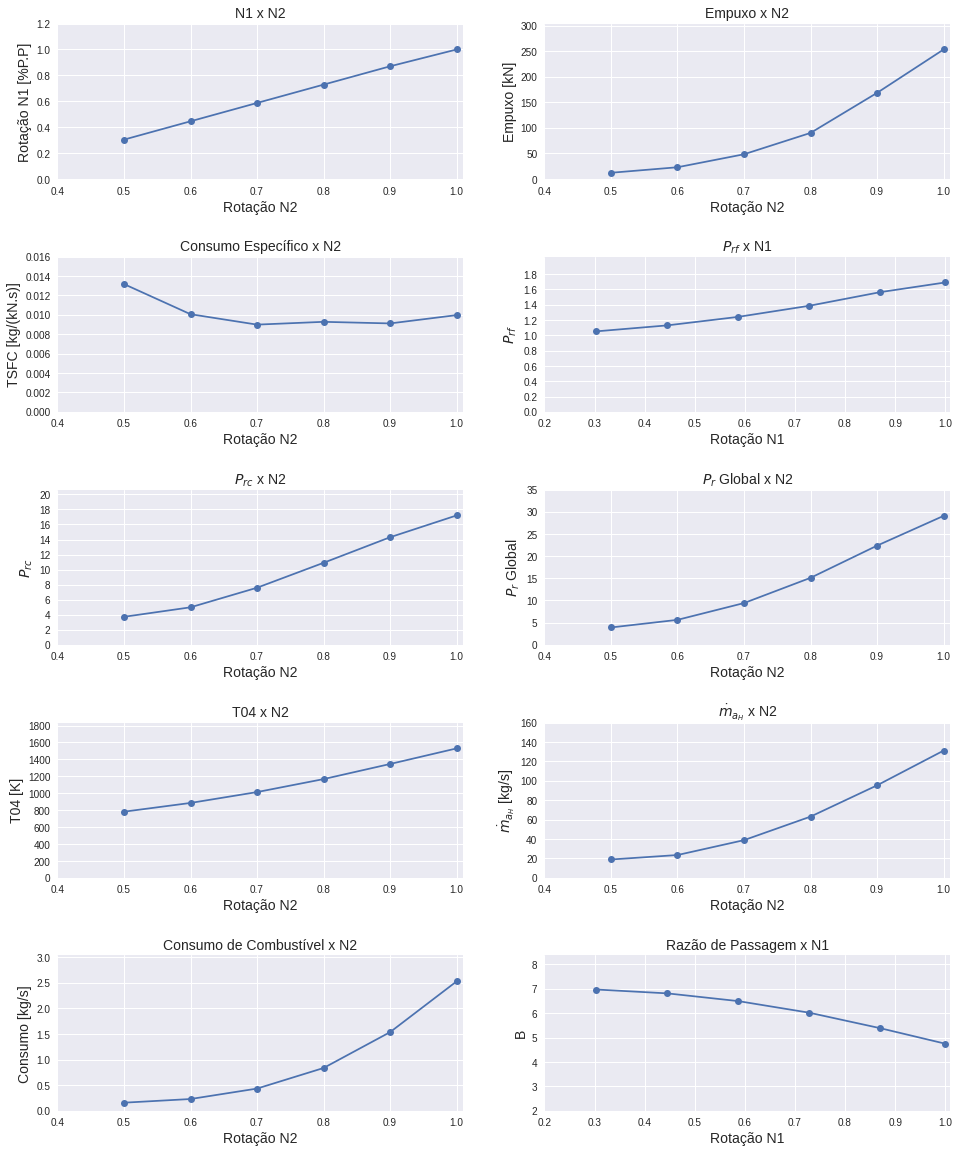

In [19]:
# Plotagem de resultados conforme material
fontsize=14
cols = 2
rows=5
fig, ax = plt.subplots(nrows=rows, ncols=cols, figsize=(16,20))
fig.subplots_adjust(hspace=.5)
aux=0
for i in range(0,rows):
    for j in range(0,cols):
        plt.sca(ax[i,j])
        if results.index[aux] == 'prf':
            plt.plot(results.loc['n1'], results.iloc[aux], marker='o')
            plt.axis([0.2,1.01,0,max(results.iloc[aux])*1.2])
            plt.xlabel('Rotação N1', fontsize=fontsize)

        elif results.index[aux] == 'bypass_ratio':
            plt.plot(results.loc['n1'], results.iloc[aux], marker='o')
            plt.axis([0.2,1.01,2,max(results.iloc[aux])*1.2])
            plt.xlabel('Rotação N1', fontsize=fontsize)
        else:
            plt.plot(results.iloc[aux], marker='o')
            plt.axis([0.4,1.01,0,max(results.iloc[aux])*1.2])
            plt.xlabel('Rotação N2', fontsize=fontsize)
        plt.ylabel(y_labels[aux], fontsize=fontsize)
        plt.title(titles[aux], fontsize=fontsize)
        plt.yticks(yticks[aux])
        aux += 1


#### Comparação de resultados

Para facilitar a comparação de resultados optou-se por gerar respostas para os mesmos pontos que rotação que os apresentados no material de referência. Além disso, foi utilizado os mesmos valores nos eixos e grade. Por não ter os valores exatos no material, apenas uma análise comparativa visual foi possível.

Nesse sentido, verificou-se que todos os gráficos apresentaram a mesma tendência de aumento ou redução do valor de interesse, na maioria os valores são aparentemente os mesmos para o modelo e o material de referência. Apesar disso, houve variações perceptíveis para os resultados de consumo específico de combustível e consumo de combustível, esses valores variam principalmente para rotações menores de 80% em que começam a ter problemas de pressão no bocal de saída dos gases quentes. Nesse ponto a pressão de entrada do bocal se torna menor que a atmosférica e foi optado por definir a velocidade de saída como 0 para poder calcular o restante dos valores.

## Exemplo 7.1: Turboélice - Calibrando o Modelo

### Descrição do Exercício

Tomando os dados do motor PW127 ao nível do mar e estacionário: potência de eixo da turbina livre 2457 kW, vazão de ar no
compressor de 8,49 kg/s, razão de pressão do compressor 15,77 e temperatura de saída da câmara de combustão de 1600K. Fazer uma calibração do motor na simulação de desempenho para que se obtenha uma potência de eixo próxima à informada pelo fabricante.

Parâmetros de funcionamento do motor:

| Condição de funcionamento de referência       |                   |
|-----------------------------------------------|-------------------|
| Vazão de massa                                | 8,49 kg/s         |
| Temperatura de saída na câmara de combustão   | 1600 K            |
| Razão de Pressão no Compressor                | 15.77             |


Condição de funcionamento:

| Condição de funcionamento |  |
|------------------------------------------|-------------------|
| Flight Mach | 0 |
| Pressão atmosférica | 101,30 kPa |
| Temperatura atmosférica | 288.15 K |
| % de rotação máxima do compressor | 1,00 |


Eficiência e dados específicos sobre a relação de calor:

| Componente | Eficiência Adiabática | Rácio de Calor Específico |
|--------------------|----------------------|---------------------|
| entrada | 0,85 | 1,40 |
| compressor | 0,75 | 1,37 | 1,37
| combustão | 1,00 | 1,35 |
| turbina do compressor | 0,90 | 1,33 | 1,33
| Turbina livre | 0,90 | 1,33 | 1,33
| bocal de ar quente | 0,98 | 1,36 | 1,36

Dados termodinâmicos:

| Dados Termodinâmicos | |
|------------------------------------------|-------------------|
| PCI | 45000 kJ/kg |
| Média R | 288,3 m^2/(s^2.K) |
| calor específico na câmara de combustão | 1,11 kJ/(kg.K) |








### Parte 1:  Ajuste da razão de pressão
Calibrar o modelo para o relatório do fabricante, variando a razão de pressão na turbina para atingir a potência da turbina especficiada de 2457 kW.

,1.800000,1.977778,2.155556,2.333333,2.511111,2.688889,2.866667,3.044444,3.222222,3.400000
BSFC,0.000134,0.000117,0.000105,0.000096,0.000089,0.000083,0.000079,0.000075,0.000072,0.000069
EBSFC,0.000134,0.000117,0.000105,0.000096,0.000089,0.000083,0.000079,0.000075,0.000072,0.000069
TSFC,0.035138,0.037701,0.040557,0.043800,0.047565,0.052051,0.057575,0.064689,0.074449,0.089252
aircraft_speed,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
fuel_consumption,0.193306,0.193306,0.193306,0.193306,0.193306,0.193306,0.193306,0.193306,0.193306,0.193306
gearbox_power,1416.250516,1624.600535,1810.793280,1978.741280,2131.431266,2271.191301,2399.868727,2518.952252,2629.657894,2732.990830
mass_flow,8.487905,8.487905,8.487905,8.487905,8.487905,8.487905,8.487905,8.487905,8.487905,8.487905
specific_power_turbine,170.260334,195.307982,217.691903,237.882457,256.238706,273.040529,288.510011,302.826123,316.135053,328.557644
specific_thrust,0.648138,0.604081,0.561540,0.519956,0.478803,0.437542,0.395556,0.352057,0.305904,0.255169
thrust_hot_air,5.501335,5.127386,4.766301,4.413335,4.064033,3.713812,3.357438,2.988227,2.596487,2.165851


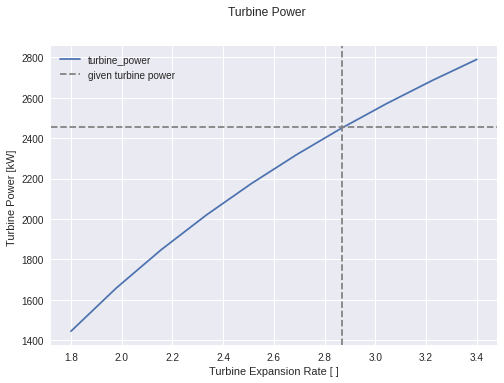

In [20]:

values = {
    'mass_flow': 8.49,
    't04': 1600,
    'prc': 15.77,
    'u_in': 0,
    'ta': 288.15,
    'pa': 101.30,
    'n_d': 0.85,
    'gamma_d': 1.4,
    'n_c': 0.75,
    'gamma_c': 1.37,
    'n_b': 1,
    'gamma_b': 1.35,
    'n_t': 0.9,
    'gamma_t': 1.33,
    'n_tl': 0.9,
    'gamma_tl': 1.33,
    'n_n': 0.98,
    'gamma_n': 1.36,
    'pc_fuel': 45000,
    'cp_fuel': 1.110,
    'cp_tls': 1.160,
    'cp_tl': 1.160,
    'r': 288.3,
    'pr_tl': 2.87,
    'gearbox_power_ratio': 0.98,
    'propeller_efficiency': 0.85,
    }


target = [
    'specific_power_turbine', 
    'turbine_power', 
    'gearbox_power', 
    'specific_thrust', 
    'BSFC', 
    'EBSFC', 
    'TSFC', 
    'thrust_hot_air', 
    'thrust_propeller', 
    'fuel_consumption', 
    'thrust_total',
    'mass_flow',
    'aircraft_speed'
    ]

list_of_turbine_pressure_ratio = np.linspace(1.8, 3.4, 10)
turboprop = mf.TurboProp(values)
performance_results = turboprop.sumarise_results()
performance_results = performance_results.drop(columns=[1])

for turbine_pressure_ratio in list_of_turbine_pressure_ratio:
    values["pr_tl"] = turbine_pressure_ratio
    turboprop = mf.TurboProp(values)
    performance_result = turboprop.sumarise_results()
    performance_results[turbine_pressure_ratio] = performance_result


fig1 = plt.figure()
fig1.suptitle("Turbine Power")
axis1 = fig1.add_subplot(111)
axis1 = performance_results.loc['turbine_power'].plot()
axis1.set_ylabel("Turbine Power [kW] ")
axis1.set_xlabel("Turbine Expansion Rate [ ]")
axis1.axhline(2457, linestyle='--', color='gray', label='given turbine power')
axis1.axvline(2.87, linestyle='--', color='gray')
axis1.legend()

performance_results

### Resultados:
Variamos a taxa de expansão da turbina para encontrar a potência da turbina que corresponde à potência da turbina dada pelo fabricante.

A partir dos resultados acima, encontramos os seguintes parâmetros para calibrar o modelo:

| Parâmetros do Motor |  |
|------------------------------------------|-------------------|
| Razão de Pressão na Turbina Livre | 2.87 |
| % de rotação máxima no compressor | 1,00 |


### Parte 2: Ajuste da Rotação

A potência termodinâmica da turbina é superior à potência limite da caixa de redução de 2050 kW.
Assim, a solução consiste em reduzir a rotação do compressor.

,0.900,0.905,0.910,0.915,0.920,0.925,0.930,0.935,0.940,0.945,...,0.955,0.960,0.965,0.970,0.975,0.980,0.985,0.990,0.995,1.000
BSFC,0.000076,0.000076,0.000076,0.000076,0.000076,0.000076,0.000076,0.000076,0.000076,0.000077,...,0.000077,0.000077,0.000077,0.000078,0.000078,0.000078,0.000078,0.000079,0.000079,0.000079
EBSFC,0.000076,0.000076,0.000076,0.000076,0.000076,0.000076,0.000076,0.000076,0.000076,0.000077,...,0.000077,0.000077,0.000077,0.000078,0.000078,0.000078,0.000078,0.000079,0.000079,0.000079
TSFC,0.097383,0.092665,0.088581,0.085001,0.081829,0.078991,0.076433,0.074111,0.071990,0.070042,...,0.066576,0.065024,0.063573,0.062212,0.060931,0.059722,0.058578,0.057492,0.056459,0.055473
aircraft_speed,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
fuel_consumption,0.129175,0.132327,0.135522,0.138760,0.142040,0.145362,0.148724,0.152126,0.155566,0.159044,...,0.166109,0.169693,0.173310,0.176959,0.180638,0.184345,0.188080,0.191840,0.195624,0.199430
gearbox_power,1665.444681,1706.942771,1748.440588,1789.910410,1831.324636,1872.655691,1913.875925,1954.957475,1995.872102,2036.591008,...,2117.322259,2157.271996,2196.900153,2236.170992,2275.046255,2313.484665,2351.441356,2388.867232,2425.708250,2461.904606
mass_flow,6.853109,6.944461,7.035312,7.125618,7.215338,7.304429,7.392847,7.480551,7.567498,7.653646,...,7.823370,7.906862,7.989384,8.070893,8.151346,8.230701,8.308915,8.385946,8.461751,8.536286
specific_power_turbine,247.979901,250.815480,253.595456,256.320108,258.989756,261.604744,264.165423,266.672127,269.125153,271.524731,...,276.163959,278.403474,280.589194,282.720531,284.796612,286.816226,288.777761,290.679148,292.517783,294.290452
specific_thrust,0.193557,0.205634,0.217463,0.229096,0.240574,0.251933,0.263200,0.274400,0.285555,0.296682,...,0.318919,0.330058,0.341226,0.352435,0.363697,0.375023,0.386421,0.397902,0.409477,0.421154
thrust_hot_air,1.326466,1.428017,1.529921,1.632450,1.735826,1.840226,1.945797,2.052665,2.160936,2.270700,...,2.495025,2.609720,2.726183,2.844467,2.964624,3.086699,3.210738,3.336787,3.464889,3.595089


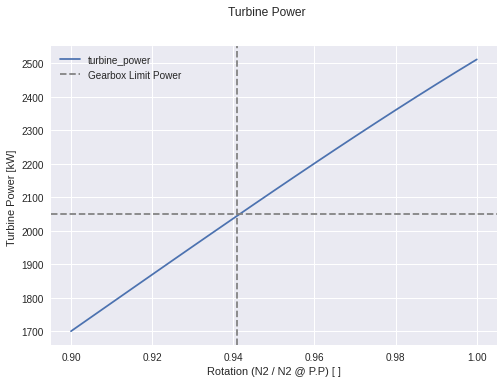

In [21]:

values = {
    'mass_flow': 8.49,
    't04': 1600,
    'prc': 15.77,
    'u_in': 0,
    'ta': 288.15,
    'pa': 101.30,
    'n_d': 0.85,
    'gamma_d': 1.4,
    'n_c': 0.75,
    'gamma_c': 1.37,
    'n_b': 1,
    'gamma_b': 1.35,
    'n_t': 0.9,
    'gamma_t': 1.33,
    'n_tl': 0.9,
    'gamma_tl': 1.33,
    'n_n': 0.98,
    'gamma_n': 1.36,
    'pc_fuel': 45000,
    'cp_fuel': 1.110,
    'cp_tl': 1.160,
    'cp_tls': 1.160,
    'r': 288.3,
    'pr_tl': 2.87,
    'gearbox_power_ratio': 0.98,
    'propeller_efficiency': 0.85,
    }


list_of_n2 = np.linspace(0.9, 1.0, 21)
turboprop = mf.TurboProp(values)
performance_results = turboprop.sumarise_results()
performance_results = performance_results.drop(columns=[1])

for n2 in list_of_n2:
    turboprop.set_n2(n2)
    performance_result = turboprop.sumarise_results()
    performance_results[n2] = performance_result


fig1 = plt.figure()
fig1.suptitle("Turbine Power")
axis1 = fig1.add_subplot(111)
axis1 = performance_results.loc['turbine_power'].plot()
axis1.set_ylabel("Turbine Power [kW] ")
axis1.set_xlabel("Rotation (N2 / N2 @ P.P) [ ]")
axis1.axhline(2050, linestyle='--', color='gray', label='Gearbox Limit Power')
axis1.axvline(0.941, linestyle='--', color='gray')
axis1.legend()

performance_results


Parâmetros do motor variados para atingir o desempenho do fabricante:

| Parâmetros do motor |  |
|------------------------------------------|-------------------|
| Razão de Pressão na Turbina Livre | 2.87 |
| % de rotação máxima no compressor | 0,941 |

## Exemplo 7.2: Turboélice - Simulação de Condição de Vôo

### Descrição do exercício

Simular agora o motor operando a 7.000 m e Mach 0,45, mantendo outros parâmetros de entrada constante em relação ao Exemplo 7.1. Como estratégia de operação considerar N1 =  100% e N2 = 85%.

Parâmetros de funcionamento do motor:

| Condição de funcionamento da linha de base | | 
|------------------------------------------|-------------------|
| Fluxo de massa | 8,49 kg/s |
| Temperatura de saída na câmara de combustão | 1600 K |
| Razão de Pressão no Compressor | 15.77 |


Condição de funcionamento:

| Condição de operação de voo | | 
|------------------------------------------|-------------------|
| Mach | 0.45 |
| Pressão atmosférica | 41,00 kPa |
| Temperatura atmosférica | 246.55 K |
| % de rotação máxima do compressor | 0,85 |


Eficiência e dados específicos sobre a relação de calor:

| Componente | Eficiência Adiabática | Rácio de Calor Específico |
|--------------------|----------------------|---------------------|
| entrada | 0,85 | 1,40 |
| compressor | 0,75 | 1,37 | 1,37
| combustão | 1,00 | 1,35 |
| turbina do compressor | 0,90 | 1,33 | 1,33
| turbina livre | 0,90 | 1,33 | 1,33
| bocal de ar quente | 0,98 | 1,36 | 1,36

Dados termodinâmicos:

| Dados Termodinâmicos | | 
|------------------------------------------|-------------------|
| PCI | 45000 kJ/kg |
| Média R | 288,3 m^2/(s^2.K) |
| calor específico na câmara de combustão | 1,11 kJ/(kg.K) |







### Resolução do exercício

In [22]:
values = {
    'mass_flow': 8.49,
    't04': 1600,
    'prc': 15.77,
    'mach': 0.45,
    'ta': 246.55,
    'pa': 41,
    'n_d': 0.85,
    'gamma_d': 1.4,
    'n_c': 0.75,
    'gamma_c': 1.37,
    'n_b': 1,
    'gamma_b': 1.35,
    'n_t': 0.9,
    'gamma_t': 1.33,
    'n_tl': 0.9,
    'gamma_tl': 1.33,
    'n_n': 0.98,
    'gamma_n': 1.36,
    'pc_fuel': 45000,
    'cp_fuel': 1.110,
    'cp_tl': 1.160,
    'cp_tls': 1.160,
    'r': 288.3,
    'pr_tl': 2.87,
    'gearbox_power_ratio': 0.98,
    'propeller_efficiency': 0.85,
    }

turboprop = mf.TurboProp(values)
turboprop.set_n2(0.85)
performance_results1 = turboprop.sumarise_results()
thermodynamic_results1 = turboprop.sumarise()

performance_results1

,0.85
BSFC,0.000083
EBSFC,0.000072
TSFC,0.012031
aircraft_speed,141.955216
fuel_consumption,0.045821
gearbox_power,620.286125
mass_flow,2.800993
specific_power_turbine,225.971634
specific_thrust,0.231101
thrust_hot_air,0.647313


## Exemplo 7.3: TurboFan - Comparando ao Turboélice (Ex. 7.2)

### Descrição do exercício

Simular um motor turbofan para cumprir a mesma missão do motor turbo hélice do exemplo 7.2, ou seja, gerar o empuxo de 4.26 kN a 7.000 m e a Mach de voo 0,45. Para fazer as simulação tomou-se como referência dados do motor PW545B, com razão de pressão total de 12,5 e razão de passagem 4,2 na condição de decolagem ao nível do mar. Algumas hipóteses foram feitas para simulação como vai ser discutido na sequência.

Parâmetros de funcionamento do motor:

| Parametros de funcionamento do motor | | 
|------------------------------------------|-------------------|
| Temperatura de saída na câmara de combustão | 1550 K |
| Razão de Pressão no Compressor | 8.33 |1.00 
| Razão de Pressão em Booster | 1.00 |
| Razão de Pressão no fan | 1.50 |
| Razao de passagem de ar | 4.2 |
| Perda de pressão na câmara de combustão | 0 % |

Condição de funcionamento:

| Condição de operação de voo | | 
|------------------------------------------|-------------------|
| mach | 0.45 |
| Pressão atmosférica | 41,00 kPa |
| Temperatura atmosférica | 246.55 K |
| % de rotação máxima do compressor | 0,85 |


Eficiência e dados específicos sobre a relação de calor:

| Componente | Eficiência Adiabática | Rácio de Calor Específico |
|--------------------|----------------------|---------------------|
| entrada | 0,97 | 1,40 |
| fan | 0,90 | 1,40 | 1,40 |
| compressor | 0,75 | 1,37 | 1,37
| combustão | 0,9995 | 1,35 | 1,35
| turbina do compressor | 0,90 | 1,33 | 1,33
| Turbina do fan | 0,90 | 1,33 | 1,33
| Bocal de ar quente | 0,98 | 1,36 |
| Bocal do fan | 0,98 | 1,40 |

Dados termodinâmicos:

| Dados Termodinâmicos | | 
|------------------------------------------|-------------------|
| PCI | 45000 kJ/kg |
| Média R | 288,3 m^2/(s^2.K) |
| calor específico na câmara de combustão | 1,11 kJ/(kg.K) |

Os parâmetros do motor variaram para alcançar o exemplo do TurboProp 7.2 de desempenho:

| Parâmetros do motor | | 
|------------------------------------------|-------------------|
| Fluxo de massa | 88,42 kg/s |


### Resolução do Exercício

In [23]:

values = {
    'pa': 41,
    'ta': 246.55,
    'n_d': 0.97,
    'n_f': 0.90,
    'n_c': 0.75,
    'n_b': 0.9995,
    'n_t': 0.9,
    'n_tf': 0.9,
    'n_n': 0.98,
    'n_nf': 0.98,
    'gamma_d': 1.4,
    'gamma_f': 1.4,
    'gamma_c': 1.37,
    'gamma_b': 1.35,
    'gamma_t': 1.33,
    'gamma_tf': 1.33,
    'gamma_n': 1.36,
    'gamma_nf': 1.40,
    'prc': 8.33,
    'prf': 1.5,
    'bypass_ratio': 4.2,
    'pc_fuel': 45000,
    'cp_fuel': 1.110,
    'r': 288.3,
    't04': 1550,
    'mach': 0.45,
    'mass_flow': 88.42,
    }

turboprop = mf.TurboFan(values)
turboprop.set_n2(0.85)
performance_results1 = turboprop.sumarise_results()
thermodynamic_results1 = turboprop.sumarise()

performance_results1

,0.85
TSFC,0.020879
cold_mass_flow,24.357569
cold_specific_thrust,512.044200
fuel_consumption,0.093073
hot_mass_flow,4.813671
hot_specific_thrust,414.011755
mass_flow,29.171240
specific_thrust,0.926056
thrust_total,4.457728


## Exercício 2: Conceito da Operação do Motor Turbofan (ponto de projeto)

* Lucas Schroeder
* Jonas Degrave

## Exercício 3: Evolução dos Motores Turbofan

* Eloi Antonio
* Gabriel Henrique

## Exercício 4: Operação dos Motores Turbo Hélice

* Camilla Santos
* Orlando Gabriel

# RELATÓRIO TÉCNICO

In [24]:
# Importing needed libraries:
import numpy
import matplotlib as plt

In [25]:
print("Hello, World!")

Hello, World!


In [26]:
for i in range(10):
    print("i: {}".format(i))

i: 0
i: 1
i: 2
i: 3
i: 4
i: 5
i: 6
i: 7
i: 8
i: 9


In [27]:
!jupyter nbconvert --to html caderno_curso_examplos.ipynb --TagRemovePreprocessor.enabled=True --TagRemovePreprocessor.remove_cell_tags="{'remove_cell'}" --TagRemovePreprocessor.remove_input_tags="{'remove_input'}"